In [1]:
import sys
import os
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller 
from statsmodels.stats.diagnostic import acorr_ljungbox 
from statsmodels.graphics.api import qqplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
"""中文显示问题"""
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']


In [2]:

filename='arima_data.xls'
forrecastnum=5
data=pd.read_excel(filename,index_col=u'date')
data.head()

,sales
date,
2015-01-01,3023
2015-01-02,3039
2015-01-03,3056
2015-01-04,3138
2015-01-05,3188


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fc05ad5ec10>,
      dtype=object)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/Users/jinhuazhu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jinhuazhu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20998 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jinhuazhu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/jinhuazhu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 24046 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/jinhuazhu/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:183: Runti

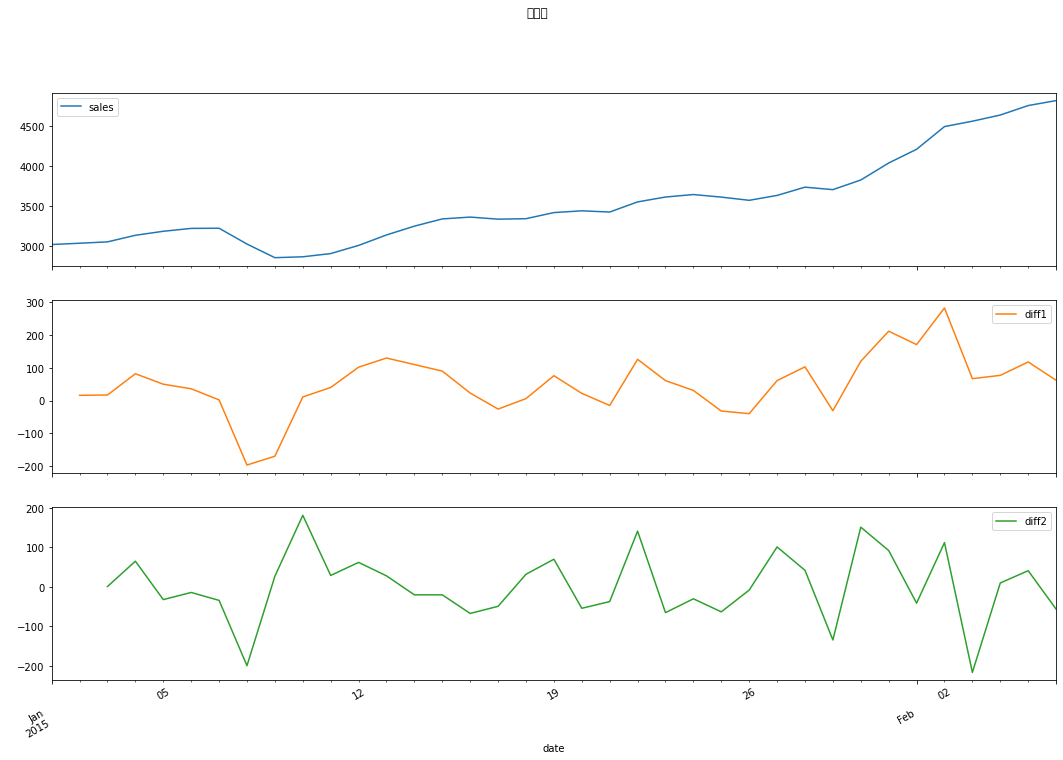

In [3]:
data["diff1"] = data["sales"].diff(1).dropna()
data["diff2"] = data["diff1"].diff(1).dropna()
data1 = data.loc[:,["sales","diff1","diff2"]]
data1.plot(subplots=True, figsize=(18, 12),title="差分图")


In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller as ADF
print("单位根检验:\n")
print(ADF(data.diff1.dropna())) 
print(ADF(data.diff2.dropna())) 


单位根检验:

(-3.1560562366723537, 0.022673435440048798, 0, 35, {'1%': -3.6327426647230316, '5%': -2.9485102040816327, '10%': -2.6130173469387756}, 287.5909090780334)
(-5.2621054943078835, 6.557208449164341e-06, 6, 28, {'1%': -3.6889256286443146, '5%': -2.9719894897959187, '10%': -2.6252957653061224}, 280.80110275775587)


In [9]:
print(data.diff2)
print(data["diff2"])


date
2015-01-01      NaN
2015-01-02      NaN
2015-01-03      1.0
2015-01-04     65.0
2015-01-05    -32.0
2015-01-06    -14.0
2015-01-07    -34.0
2015-01-08   -199.0
2015-01-09     27.0
2015-01-10    181.0
2015-01-11     29.0
2015-01-12     62.0
2015-01-13     28.0
2015-01-14    -20.0
2015-01-15    -20.0
2015-01-16    -67.0
2015-01-17    -49.0
2015-01-18     32.0
2015-01-19     70.0
2015-01-20    -54.0
2015-01-21    -37.0
2015-01-22    141.0
2015-01-23    -65.0
2015-01-24    -30.0
2015-01-25    -63.0
2015-01-26     -8.0
2015-01-27    101.0
2015-01-28     42.0
2015-01-29   -134.0
2015-01-30    151.0
2015-01-31     92.0
2015-02-01    -41.0
2015-02-02    112.0
2015-02-03   -216.0
2015-02-04     10.0
2015-02-05     41.0
2015-02-06    -56.0
Name: diff2, dtype: float64
date
2015-01-01      NaN
2015-01-02      NaN
2015-01-03      1.0
2015-01-04     65.0
2015-01-05    -32.0
2015-01-06    -14.0
2015-01-07    -34.0
2015-01-08   -199.0
2015-01-09     27.0
2015-01-10    181.0
2015-01-11     29.0
20